# Analyse resonators directly from VNA

## Import modules

In [1]:
import lmfit
import scipy.io as sio
import resonator
from resonator import background, shunt, see
import random
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt, savetxt
from scipy.signal import find_peaks

In [2]:
# Fancy plot font, can be removed if it causes any issue
from matplotlib import font_manager
#font_path = '/Users/cfl831/Documents/Font/cmunrm.ttf'
font_path = '/Users/cfl831/Documents/Font/arial.ttf'
prop = font_manager.FontProperties(fname=font_path)
fsize = 18

### Import labber to be able to read hdf5

In [3]:
# import sys
# path1 = '/Users/cfl831'
# sys.path.append(path1)
import Labber
# C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\Res8_powerscan_10dB.hdf5

## Buddy functions

In [4]:
# Fitting functions
def n_complex(absolute, phase):
    return absolute*np.exp(1j*phase)

In [5]:
# Fitting functions
def unwrap_phase(phases):
    phases = np.unwrap(phases)
    n = len(phases)
    background = phases[0] + (phases[-1]-phases[0])*np.arange(n)/n
    return phases - background

# Analysis of bare resonator

In [6]:
real_peaks = np.array([6.63])*1e9

In [7]:
Lfile = Labber.LogFile(filename[ii])
Lfile.getData(entry = 3)

NameError: name 'filename' is not defined

In [ ]:
Qcs = np.zeros(len(real_peaks))
Qcs_error = np.zeros(len(real_peaks))
Qis = np.zeros(len(real_peaks))
Qis_error = np.zeros(len(real_peaks))
frs = np.zeros(len(real_peaks)) 

[ 8153.94799928  7307.56684169  6466.29681094  5660.02400682
  4939.76396667  4423.94029604  4149.66043352  3941.00448698
  3845.26391215  3891.76431038  3745.51345415  3704.86678461
  3651.50736562  3729.90895976  3831.23476493  3762.95171622
  3681.36673687  3863.67777962  4016.71469536  3826.06588682
  3884.83042461  3907.88433452  3669.65084907  3693.23716974
  3746.6778366   3565.7810636   3387.30255334  3453.56046391
  3312.84831572  3415.81525645  3242.19301104  3212.43321209
  3080.46326639  2697.83831136  2504.0436718   2447.83113962
  2204.27266169  2080.15269602  2126.99570547  2097.85838033
  2044.0548255   2072.06073624  2267.69903193  2082.65682668
  2200.39967942  2482.2709456   2565.64740534  2820.82159381
  2905.66904514  3439.48927309  3271.37929093  4051.24906154
  4184.21587019  4974.09259021  4644.97833635  5911.00930263
  6768.64394316  6625.97811082  5226.886346    6311.98850727
  7668.22310819  7170.82450195 12972.73722944 11599.62558001
 16741.18602207 11053.12

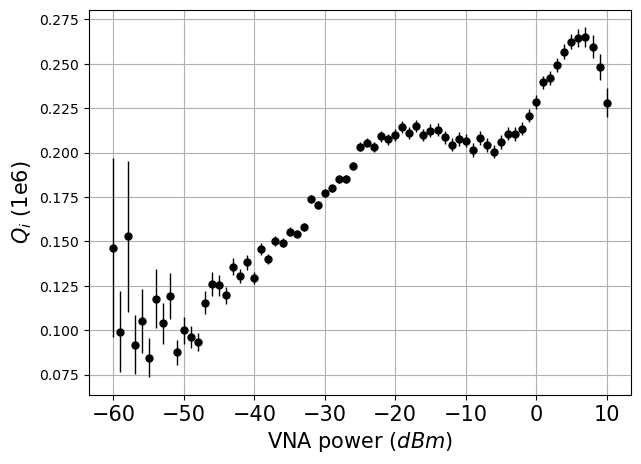

In [9]:
# filename_1 = r"C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\res4Quality.hdf5"
filename_1 =  r"C:\Users\jiaop\OneDrive\Skrivebord\Fluxonium\python\Modules\Res8_powerscan_10dB_2.hdf5"
filename = [filename_1]
Qi = []
Qi_err = []
Lfile = Labber.LogFile(filename[0])
freq, _ = Lfile.getTraceXY(entry=2)
S21 = Lfile.getData()
for i in range(np.shape(S21)[0]):
    r = shunt.LinearShuntFitter(frequency=freq, 
                                data=S21[i, :],
                                background_model=background.MagnitudeSlopeOffsetPhaseDelay())
    Qi.append(r.Q_i) if r.Q_i_error is not None and r.Q_i_error < r.Q_i else  Qi.append(np.nan)
    Qi_err.append(r.Q_i_error) if r.Q_i_error is not None and r.Q_i_error < r.Q_i else Qi_err.append(np.nan)
    # plt.figure()
    # fig, (ax_mag, ax_phase, ax_complex) = plt.subplots(1, 3, figsize=(13, 4), dpi=300)
    # see.magnitude_vs_frequency(resonator=r, axes=ax_mag, normalize=True, frequency_scale=1e-9)
    # see.phase_vs_frequency(resonator=r, axes=ax_phase, normalize=True, frequency_scale=1e-9)
    # see.real_and_imaginary(resonator=r, axes=ax_complex, normalize=True)
    
# plt.style.use("presentation.mplstyle")
plt.figure(figsize=(7, 5))
power = np.linspace(10, -60, np.shape(S21)[0])
Qi = np.array(Qi)
Qi_err = np.array(Qi_err)
print(Qi_err)
plt.errorbar(x=power, y=Qi/1e6, yerr=Qi_err/1e6, linestyle='', marker='o', ecolor='k', color='k', ms=5, linewidth = 1, elinewidth=1)
plt.ylabel("$Q_i$ (1e6)", fontsize=15)
plt.xlabel("VNA power ($dBm$)", fontsize=15)
# plt.ylim((0, 2))
# plt.yticks(ticks = np.linspace(0.6, 1.2, 4), label = np.linspace(0.6, 1.2, 4), fontsize=15)
plt.xticks(fontsize=15)
plt.grid(None)
plt.show()

# plt.legend(frameon=False,fontsize=15)

# plt.figure()
# fig, (ax_mag, ax_phase, ax_complex) = plt.subplots(1, 3, figsize=(13, 4), dpi=300)
# see.magnitude_vs_frequency(resonator=r, axes=ax_mag, normalize=True, frequency_scale=1e-9)
# see.phase_vs_frequency(resonator=r, axes=ax_phase, normalize=True, frequency_scale=1e-9)
# see.real_and_imaginary(resonator=r, axes=ax_complex, normalize=True)
# plt.savefig("Ta_resonator_Qi.pdf", format="pdf", bbox_inches="tight", transparent=True)
# plt.show()

In [10]:
power

array([ 10.,   9.,   8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0.,
        -1.,  -2.,  -3.,  -4.,  -5.,  -6.,  -7.,  -8.,  -9., -10., -11.,
       -12., -13., -14., -15., -16., -17., -18., -19., -20., -21., -22.,
       -23., -24., -25., -26., -27., -28., -29., -30., -31., -32., -33.,
       -34., -35., -36., -37., -38., -39., -40., -41., -42., -43., -44.,
       -45., -46., -47., -48., -49., -50., -51., -52., -53., -54., -55.,
       -56., -57., -58., -59., -60.])

In [11]:
# Store Qcs and Qis of all resonators

for ii in range(len(real_peaks)):
    # Choose resonator and extract data
    # Data path
    Lfile = Labber.LogFile(filename[ii])
    frequency, s21_complex = Lfile.getTraceXY(entry = 0)
    # Variables
    mag = np.absolute(s21_complex)
    phase = np.angle(s21_complex)
    freqs = frequency
    
    # First fit attempt
    r = shunt.LinearShuntFitter(frequency=freqs, 
                                data=s21_complex,
                                background_model=background.MagnitudeSlopeOffsetPhaseDelay())
    error = float(1 if r.phase_error is None else r.phase_error)
    
    if error > 0.03:
        # Remove background correction
        r = shunt.LinearShuntFitter(frequency=freqs, 
                                data=s21_complex)
        error = float(1 if r.phase_error is None else r.phase_error)

        w_f = 0.001
        counter = 0
        Qprov = r.Q_i
        while error > 0.01 or Qprov > 8e6:
            index_left = np.argmin(np.abs(freqs-(real_peaks[ii]-w_f*1e9)))
            index_right = np.argmin(np.abs(freqs-(real_peaks[ii]+w_f*1e9)))

            # Fit
            d_complex = n_complex(mag[index_left:index_right], unwrap_phase(phase[index_left:index_right]))
            r = shunt.LinearShuntFitter(frequency=freqs[index_left:index_right], 
                                        data=d_complex, 
                                        background_model=background.MagnitudeSlopeOffsetPhaseDelay())
            error = float(1 if r.phase_error is None else r.phase_error)
            Qprov = r.Q_i
            w_f += 0.001
            counter += 1
            if counter == 30:
                print('Oopsie')
                break
            
    Qcs[ii] = r.Q_c
    Qis[ii] = r.Q_i
    Qis_error[ii] = r.Q_i_error
    Qcs_error[ii] = r.Q_c_error
    frs[ii] = r.f_r/1e9
    
    fig, (ax_mag, ax_phase, ax_complex) = plt.subplots(1, 3, figsize=(13, 4), dpi=300)  # Adjust these values for your plot settings

    see.magnitude_vs_frequency(resonator=r, axes=ax_mag, normalize=True, frequency_scale=1e-9)
    see.phase_vs_frequency(resonator=r, axes=ax_phase, normalize=True, frequency_scale=1e-9)
    see.real_and_imaginary(resonator=r, axes=ax_complex, normalize=True)
    print('Resonator {}:'.format(ii)+' Qi:'+str(Qis[ii])+' Qc:'+str(Qcs[ii])+' fr:'+str(frs[ii])+' Q:'+str(r.Q_t)+' Qierror:'+str(r.Q_i_error))

NameError: name 'Qcs' is not defined

## Power sweep

In [ ]:
filename_1 = '/Users/cfl831/Documents/PhD/Analysis/Code/Devices/4_Gatemon_nbtin_18_04_23/Data/VNA_PowerScan_goodres_36dbmRTatten.hdf5'
filename = [filename_1]

In [ ]:
real_peaks = np.array([7.8])*1e9
power_sweep = np.arange(10,-80,-2)

In [ ]:
Qcs = np.ones((len(power_sweep),len(real_peaks)))
Qcs_error = np.ones((len(power_sweep),len(real_peaks)))
Qis = np.ones((len(power_sweep),len(real_peaks)))
Qis_error = np.ones((len(power_sweep),len(real_peaks)))
frs = np.ones((len(power_sweep),len(real_peaks)))

In [ ]:
# Store Qcs and Qis of all resonators
for ii in range(len(real_peaks)):
    # Data path
    Lfile = Labber.LogFile(filename[ii])
    power_pts = Lfile.getNumberOfEntries()
    for jj in range(power_pts):
        # Choose resonator and extract data
        frequency, s21_complex = Lfile.getTraceXY(entry = jj)
        # Variables
        mag = np.absolute(s21_complex)
        phase = np.angle(s21_complex)
        freqs = frequency

        # First fit attempt
        r = shunt.LinearShuntFitter(frequency=freqs, 
                                    data=s21_complex,
                                    background_model=background.MagnitudeSlopeOffsetPhaseDelay())
        error = float(1 if r.phase_error is None else r.phase_error)

        if error > 0.03:
            # Add background correction
            r = shunt.LinearShuntFitter(frequency=freqs, 
                                    data=s21_complex)
            error = float(1 if r.phase_error is None else r.phase_error)

            w_f = 0.001
            counter = 0
            Qprov = r.Q_i
            while error > 0.01 or Qprov > 8e6:
                index_left = np.argmin(np.abs(freqs-(real_peaks[ii]-w_f*1e9)))
                index_right = np.argmin(np.abs(freqs-(real_peaks[ii]+w_f*1e9)))

                # Fit
                d_complex = n_complex(mag[index_left:index_right], unwrap_phase(phase[index_left:index_right]))
                r = shunt.LinearShuntFitter(frequency=freqs[index_left:index_right], 
                                            data=d_complex, 
                                            background_model=background.MagnitudeSlopeOffsetPhaseDelay())
                error = float(1 if r.phase_error is None else r.phase_error)
                Qprov = r.Q_i
                w_f += 0.001
                counter += 1
                if counter == 30:
                    print('Oopsie')
                    break

        Qcs[jj][ii] = r.Q_c
        Qis[jj][ii] = r.Q_i
        Qis_error[jj][ii] = r.Q_i_error
        Qcs_error[jj][ii] = r.Q_c_error
        frs[jj][ii] = r.f_r/1e9
        
        #if r.Q_i_error/1e6 < 0.12 and r.Q_i_error/1e6 > 0:

        #    fig, (ax_mag, ax_phase, ax_complex) = plt.subplots(1, 3, figsize=(13, 4), dpi=300)  # Adjust these values for your plot settings

         #   see.magnitude_vs_frequency(resonator=r, axes=ax_mag, normalize=True, frequency_scale=1e-9)
         #   see.phase_vs_frequency(resonator=r, axes=ax_phase, normalize=True, frequency_scale=1e-9)
         #   see.real_and_imaginary(resonator=r, axes=ax_complex, normalize=True)
        #print('Resonator {}:'.format(ii)+' Qi:'+str(Qis[jj][ii])+' Qc:'+str(Qcs[jj][ii])+' fr:'+str(frs[jj][ii])+' Q:'+str(r.Q_t))

In [ ]:
def photon_number(Pin,Qi,Qc,fr):
    h = 6.62607015e-34 # PlancK constant in eV.s
    k_B =  1.380648813e-23
    T = 0.057 
    hbar = h/(2*np.pi)
    Qt = 1/(1/Qi+1/Qc)
    w0 = 2*np.pi*fr*1e9
    n_thermal = 1./(np.exp(hbar*w0/k_B/T)-1.) # Number of photons due to thermal excitations
    nph = (2*Pin*Qt**2)/(Qc*hbar*w0**2)+n_thermal
    return nph

In [ ]:
fig = plt.figure(figsize=(8,3))
colors = ['C0','C1','C2','C3','C4','C5','C6','C7']
for jj in range(len(real_peaks)):
    plt.plot(power_sweep[10],Qis[10][jj]/1e6,'o',markersize=4,color=colors[jj], label = 'fr:{}'.format(np.round(frs[10][jj],2)))
    for ii in range(len(power_sweep)):
        Pin = 10**((power_sweep[ii]-60)/10)/1000
        nph = photon_number(Pin,Qis[ii][jj],Qcs[ii][jj],frs[ii][jj])
        if Qis_error[ii][jj]/1e6 < 0.12 and Qis_error[ii][jj]/1e6 > 1e-6:
            plt.plot(power_sweep[ii],Qis[ii][jj]/1e6,'o',markersize=4,color=colors[jj])
            plt.errorbar(power_sweep[ii],Qis[ii][jj]/1e6, yerr = Qis_error[ii][jj]/1e6,ecolor = 'red')
    
plt.xlabel("VNA output power (dBm)",fontsize=fsize,fontproperties=prop)
plt.ylabel("Qi (1e6)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize,fontproperties=prop); 
plt.xticks(fontsize=fsize,fontproperties=prop)
plt.legend(frameon=False)
#plt.xlim([6.08, 7.05])
#plt.ylim([0, 0.2])
plt.rc('axes', unicode_minus=False)

In [ ]:
fig = plt.figure(figsize=(8,3))
colors = ['C0','C1','C2','C3','C4','C5','C6','C7']
for jj in range(len(real_peaks)):
    plt.plot(power_sweep[10],Qis[10][jj]/1e6,'o',markersize=4,color=colors[jj], label = 'fr:{}'.format(np.round(frs[10][jj],2)))
    for ii in range(len(power_sweep)):
        Pin = 10**((power_sweep[ii]-60)/10)/1000
        nph = photon_number(Pin,Qis[ii][jj],Qcs[ii][jj],frs[ii][jj])
        if Qis_error[ii][jj]/0.12e6 < 1 and Qis_error[ii][jj]/1e6 > 1e-6:
            plt.semilogx(nph,Qis[ii][jj]/1e6,'o',markersize=4,color=colors[jj])
            plt.errorbar(nph,Qis[ii][jj]/1e6, yerr = Qis_error[ii][jj]/1e6,ecolor = 'red')

plt.xlabel("Photon number",fontsize=fsize,fontproperties=prop)
plt.ylabel("Qi (1e6)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize,fontproperties=prop); 
plt.xticks(fontsize=fsize,fontproperties=prop)
plt.legend(frameon=False)
#plt.xlim([0.1, 0.3e6])
#plt.ylim([-1.5, 0.15])
plt.rc('axes', unicode_minus=False)

In [ ]:
fig = plt.figure(figsize=(8,3))
colors = ['C0','C1','C2','C3','C4','C5','C6','C7']
for jj in range(len(real_peaks)):
    plt.plot(power_sweep[10],Qcs[10][jj]/1e6,'o',markersize=4,color=colors[jj], label = 'fr:{}'.format(np.round(frs[10][jj],2)))
    for ii in range(len(power_sweep)):
        Pin = 10**((power_sweep[ii]-60)/10)/1000
        nph = photon_number(Pin,Qis[ii][jj],Qcs[ii][jj],frs[ii][jj])
        if Qis_error[ii][jj]/1e6 < 1 and Qis_error[ii][jj]/1e6 > 1e-6:
            plt.plot(power_sweep[ii],Qcs[ii][jj]/1e3,'o',markersize=4,color=colors[jj])
            plt.errorbar(power_sweep[ii],Qcs[ii][jj]/1e3, yerr = Qcs_error[ii][jj]/1e3,ecolor = 'red')
    
plt.xlabel("VNA output power (dBm)",fontsize=fsize,fontproperties=prop)
plt.ylabel("Qc (1e3)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize,fontproperties=prop); 
plt.xticks(fontsize=fsize,fontproperties=prop)
plt.legend(frameon=False)
#plt.xlim([6.08, 7.05])
#plt.ylim([0, 4])
plt.rc('axes', unicode_minus=False)

In [ ]:
fig = plt.figure(figsize=(8,3))
colors = ['C0','C1','C2','C3','C4','C5','C6','C7']
for jj in range(len(real_peaks)):
    plt.plot(power_sweep[10],Qcs[10][jj]/1e6,'o',markersize=4,color=colors[jj], label = 'fr:{}'.format(np.round(frs[10][jj],2)))
    for ii in range(len(power_sweep)):
        Pin = 10**((power_sweep[ii]-60)/10)/1000
        nph = photon_number(Pin,Qis[ii][jj],Qcs[ii][jj],frs[ii][jj])
        if Qis_error[ii][jj]/0.12e6 < 1 and Qis_error[ii][jj]/1e6 > 1e-6:
            plt.semilogx(nph,Qcs[ii][jj]/1e3,'o',markersize=4,color=colors[jj])
            plt.errorbar(nph,Qcs[ii][jj]/1e3, yerr = Qcs_error[ii][jj]/1e3,ecolor = 'red')
    
plt.xlabel("Photon number",fontsize=fsize,fontproperties=prop)
plt.ylabel("Qc (1e3)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize,fontproperties=prop); 
plt.xticks(fontsize=fsize,fontproperties=prop)
plt.legend(frameon=False)
#plt.xlim([0.1, 0.3e6])
#plt.ylim([-1.5, 0.15])
plt.rc('axes', unicode_minus=False)

In [ ]:
VNA_PowerScan_goodres_36dbmRTatten.hdf5

## Resonator spectroscopy vs gate

In [ ]:
filename_2 = '/Users/cfl831/Documents/PhD/Analysis/Code/Devices/Gatemon_brother_27_03_23/Data/037/keithley_volt_set_S21_frequency_set.dat'
filename = [filename_2]

In [ ]:
a = np.loadtxt(filename_2)

In [ ]:
vgate = np.unique(a[:,0])
frequency = np.unique(a[:,1])
s21 = np.flipud(a[:, 2].reshape(len(vgate),len(frequency), -1))

In [ ]:
# Plot
plt.figure(figsize=(7, 5))
plt.imshow(s21,aspect='auto',interpolation='none',origin='lower',cmap = 'seismic',extent=[frequency[0]/1e9,frequency[-1]/1e9,vgate[0],vgate[-1]])
plt.xlabel("Frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.ylabel("Gate voltage (V)",fontsize=fsize,fontproperties=prop)
cbar=plt.colorbar()
cbar.set_label('S21',labelpad=15,fontsize=fsize-5,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-7,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
for t in cbar.ax.get_yticklabels():
    t.set_fontproperties(prop)
    t.set_fontsize(fsize-7)
    
# Plot minimum values
fr_gate = np.ones(len(vgate))
for ii in range(len(vgate)):
    s21min = np.min(s21[ii,:])
    indmin = np.argmin(np.abs(s21[ii,:]-s21min))
    fr_gate[ii] = frequency[indmin] 

fr_gate_new = np.delete(fr_gate,43) 
vgate_new = np.delete(vgate,43) 

plt.plot(fr_gate_new/1e9,vgate_new,'--k',linewidth = 0.5)
#plt.savefig('/Users/DavidFeldstein/Documents/Master Delft/Internship/Work/Report/Figures/qubit_spec_xgain.svg',bbox_inches='tight',dpi=300)

## Qubit spectroscopy vs gate

In [ ]:
filename_3 = '/Users/cfl831/Documents/PhD/Analysis/Code/Devices/Gatemon_brother_27_03_23/Data/037/keithley_volt_set_SPEC_frequency_set.dat'
filename_q = [filename_3]

In [ ]:
b = np.loadtxt(filename_3)

In [ ]:
vgate = np.unique(b[:,0])
frequency= np.unique(b[:,1])
s21 = np.flipud(b[:, 2].reshape(len(vgate),len(frequency), -1))

In [ ]:
## Plot
plt.figure(figsize=(7, 5))
plt.imshow(s21,aspect='auto',interpolation='none',origin='lower',cmap = 'viridis',extent=[frequency[0]/1e9,frequency[-1]/1e9,vgate[0],vgate[-1]])
plt.xlabel("Frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.ylabel("Gate voltage (V)",fontsize=fsize,fontproperties=prop)
cbar=plt.colorbar()
cbar.set_label('S21',labelpad=15,fontsize=fsize-5,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-7,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
for t in cbar.ax.get_yticklabels():
    t.set_fontproperties(prop)
    t.set_fontsize(fsize-7)

# Plot maximum values
fq_gate = np.ones(len(vgate))
for ii in range(len(vgate)):
    s21max = np.max(s21[ii,:])
    indmax = np.argmin(np.abs(s21[ii,:]-s21max))
    fq_gate[ii] = frequency[indmax] 

            
fq_gate_new = np.delete(fq_gate,43) 
vgate_new = np.delete(vgate,43) 
plt.plot(fq_gate_new/1e9,vgate_new,'--w',linewidth = 0.5)
    
#plt.savefig('/Users/DavidFeldstein/Documents/Master Delft/Internship/Work/Report/Figures/qubit_spec_xgain.svg',bbox_inches='tight',dpi=300)

## Coupling versus gate

In [ ]:
# Coupling calculation
fres_bare = 6.3548e9
fre_dressed = 6.3557e9
fres_dressed_gate = fr_gate
fq_dressed_gate = fq_gate
g_gate = np.sqrt((fr_gate-fres_bare)*(fres_bare-fq_dressed_gate))

In [ ]:
## Plot
plt.figure(figsize=(5, 5))
plt.plot(vgate,g_gate/1e6,'o')
plt.ylabel("Coupling g (MHz)",fontsize=fsize,fontproperties=prop)
plt.xlabel("Gate voltage (V)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize,fontproperties=prop); 
plt.xticks(fontsize=fsize,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
    
#plt.savefig('/Users/DavidFeldstein/Documents/Master Delft/Internship/Work/Report/Figures/qubit_spec_xgain.svg',bbox_inches='tight',dpi=300)

## Qubit spectroscopy reproducibility

In [ ]:
iteration_folder = ['030','031','032','033','034','035','036','037','038','039','040']

In [ ]:
def extract_qubit_spec(folder):
    qubit_spec_all_data = np.loadtxt(folder)
    
    vgate = np.unique(qubit_spec_all_data[:,0])
    frequency= np.unique(qubit_spec_all_data[:,1])
    s21 = np.flipud(qubit_spec_all_data[:, 2].reshape(len(vgate),len(frequency), -1))
    
    return vgate, frequency, s21

In [ ]:
## Extract data of a single trace
iteration = iteration_folder[0] # Choose iteration, I chose 0
filename_qs_repro = '/Users/cfl831/Documents/PhD/Analysis/Code/Devices/Gatemon_brother_27_03_23/Data/nw1_reproducibility/{}/keithley_volt_set_SPEC_frequency_set.dat'.format(iteration)
vgate, frequency, s21 = extract_qubit_spec(filename_qs_repro)

## Plot single trace
plt.figure(figsize=(7, 5))
plt.imshow(s21,aspect='auto',interpolation='none',origin='lower',cmap = 'viridis',extent=[frequency[0]/1e9,frequency[-1]/1e9,vgate[0],vgate[-1]])
plt.xlabel("Frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.ylabel("Gate voltage (V)",fontsize=fsize,fontproperties=prop)
cbar=plt.colorbar()
cbar.set_label('S21',labelpad=15,fontsize=fsize-5,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-7,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
for t in cbar.ax.get_yticklabels():
    t.set_fontproperties(prop)
    t.set_fontsize(fsize-7)

# Plot maximum values
fq_gate = np.ones(len(vgate))
for ii in range(len(vgate)):
    s21max = np.max(s21[ii,:])
    indmax = np.argmin(np.abs(s21[ii,:]-s21max))
    fq_gate[ii] = frequency[indmax] 

            
plt.plot(fq_gate/1e9,vgate,'--w',linewidth = 0.5)
    
#plt.savefig('/Users/DavidFeldstein/Documents/Master Delft/Internship/Work/Report/Figures/qubit_spec_xgain.svg',bbox_inches='tight',dpi=300)

## Qubit spectroscopy vs time

In [ ]:
filename_qs_time = '/Users/cfl831/Documents/PhD/Analysis/Code/Devices/Gatemon_brother_27_03_23/Data/NW1_specvsTime_3.hdf5'

In [ ]:
# Extract data
s21_all = Lfile.getData('Multi-Qubit Pulse Generator - Voltage, QB1').transpose()
magnitude_all = np.abs(s21_all)
frequency_drive = Lfile.getTraceXY()[0]
time_iteration = np.arange(0,len(magnitude_all.transpose())+1,1)*5.3/len(magnitude_all.transpose())

In [ ]:
## Plot
plt.figure(figsize=(7, 5))
plt.imshow(magnitude_all*1e6,aspect='auto',interpolation='none',origin='lower',cmap = 'viridis',extent=[time_iteration[0],time_iteration[-1],frequency_drive[0]/1e9,frequency_drive[-1]/1e9])
plt.ylabel("Drive frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.xlabel("Time (h)",fontsize=fsize,fontproperties=prop)
cbar=plt.colorbar()
cbar.set_label('Transmitted voltage (uV)',labelpad=15,fontsize=fsize-5,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-3,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
for t in cbar.ax.get_yticklabels():
    t.set_fontproperties(prop)
    t.set_fontsize(fsize-7)

In [ ]:
## Extract trace
magnitude_ii = magnitude_all.transpose()[1]*1e6

## Plot single trace
plt.figure(figsize=(7, 5))
plt.plot(frequency_drive*1e-9,magnitude_ii,'-')
plt.ylabel("Transmitted voltage (uV)",fontsize=fsize,fontproperties=prop)
plt.xlabel("Drive frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-3,fontproperties=prop);
plt.rc('axes', unicode_minus=False)

## Find peaks
peaks, properties = find_peaks(magnitude_ii, width=1.7, prominence = 7, distance = 100)
plt.plot(frequency_drive[peaks]*1e-9, magnitude_ii[peaks],'o')

In [ ]:
## Find peak for each iteration
peaks_all = np.ones((2,len(time_iteration)))
for ii in range(len(time_iteration)-1):
    ## Extract trace
    magnitude_ii = magnitude_all.transpose()[ii]*1e6
    ## Find peaks
    peaks, properties = find_peaks(magnitude_ii, width=1.7, prominence = 7,distance = 160)
    peaks_all[0][ii] = peaks[0]
    peaks_all[1][ii] = peaks[1]
    

In [ ]:
for ii in range(len(time_iteration)-1):
    plt.plot(time_iteration[ii],frequency_drive[int(peaks_all[0][ii])]*1e-9,'ok')
    plt.plot(time_iteration[ii],frequency_drive[int(peaks_all[1][ii])]*1e-9,'or')

plt.xlim([time_iteration[0],time_iteration[-1]])
plt.ylim([frequency_drive[0]*1e-9,frequency_drive[-1]*1e-9])
plt.ylabel("Drive frequency (GHz)",fontsize=fsize,fontproperties=prop)
plt.xlabel("Time (h)",fontsize=fsize,fontproperties=prop)
plt.yticks(fontsize=fsize-3,fontproperties=prop); 
plt.xticks(fontsize=fsize-3,fontproperties=prop);
plt.rc('axes', unicode_minus=False)
